### Chapter 8. Introduction to dynamic programming

Reference: 
Fehr, H. and Kindermann, F. 2018. The overlapping generations model. <i>Introduction to Computational Economics Using Fortran.</i> Oxford University Press. pp289-322.

In [1]:
# include useful packages
import numpy as np
import matplotlib.pyplot as plt

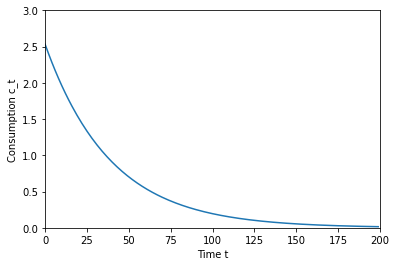

In [2]:
## Program 8.1 All-in-one solution to the cake-eating problem
T = 200            #maximum time range
a0 = 100           #source size (cake size)
β = .95            #time discount factor
γ = .5             #intertemporal elasticity of substitution

c = np.zeros(T)    #consumption
time = np.zeros(T) #time index

for t in range(T):
    c[t] = β**(t*γ)*(1-β**γ)*a0  #consumption solved from first order conditions
    time[t] = t

plt.figure()
plt.plot(time,c)
plt.ylabel('Consumption c_t')
plt.xlabel('Time t')
plt.xlim(0,200)
plt.ylim(0,3)
plt.show()

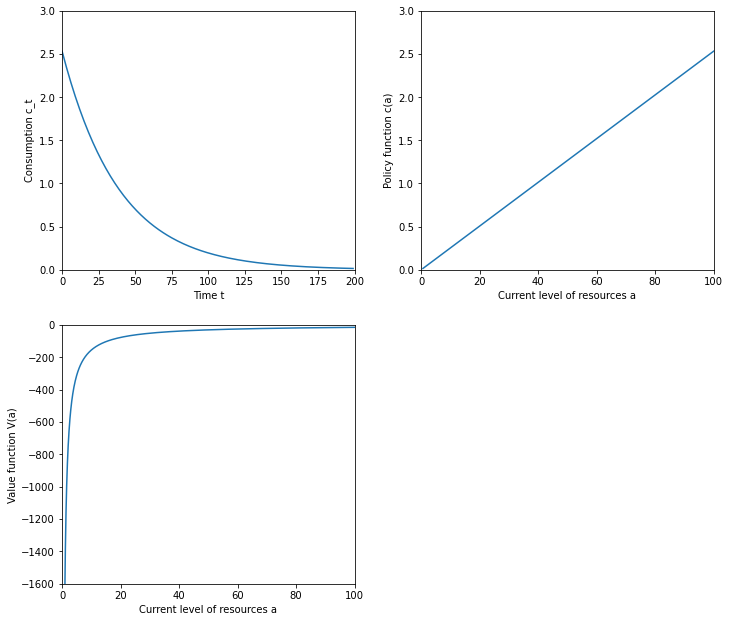

In [3]:
## Program 8.2 Dynamic solution to the cake-eating problem
T = 200            #maximum time range
a0 = 100           #resource size (cake size)
β = .95            #time discount factor
γ = .5             #intertemporal elasticity of substitution
egam = 1.0 - 1.0/γ #denominator of utility function
NA = 200           #cake resources are discretized into 200 levels

ct = np.zeros(T)   #consumption trend in terms of time
at = np.zeros(T)   #asset trend in terms of time

at[0] = a0         #initial asset as full resource
ct[0] = at[0]*(1-β**γ) #initial consumption follows first order condition c=a(1-β^γ)

for t in range(1,T):
    at[t] = at[t-1] - ct[t-1]  #calculate asset holdings at each period
    ct[t] = at[t]*(1.0-β**γ)   #calculate consumption at each period

fig, axs = plt.subplots(2,2,figsize=(10.5,9))
axs[0,0].plot(time, ct)
axs[0,0].set_ylabel('Consumption c_t')
axs[0,0].set_xlabel('Time t')
axs[0,0].set_xlim(0,200)
axs[0,0].set_ylim(0,3)

a = np.zeros(NA)   #consumption trend in terms of resource levels
c = np.zeros(NA)   #asset trend in terms of resource levels
V = np.zeros(NA)   #value function trend in terms of resource levels

for n in range(NA):
    if n == 0:
        a[n] = a0  #assets before action as full resource
    else:
        a[n] = a[n-1]*β**γ   #asset holding as resource left a^+=aβ^γ equation on page 297
    c[n] = a[n]*(1-β**γ)     #corresponding consumption c=a(1-β^γ)    equation on page 297
    V[n] = (1-β**γ)**(-1.0/γ)*a[n]**egam/egam #value function V(a)=[1-β^γ]^(-1/γ)a^(1-1/γ)/(1-1/γ) equation on page 297  
    
    
axs[0,1].plot(a,c)
axs[0,1].set_xlim(0,100)
axs[0,1].set_ylim(0,3)
axs[0,1].set_ylabel('Policy function c(a)')
axs[0,1].set_xlabel('Current level of resources a')
    

axs[1,0].plot(a,V)
axs[1,0].set_xlim(0,100)
axs[1,0].set_ylim(-1600,0)
axs[1,0].set_ylabel('Value function V(a)')
axs[1,0].set_xlabel('Current level of resources a')
    
fig.tight_layout(pad=2.0)
fig.delaxes(axs[1,1])

In [4]:
## Program 8.3 Value function iteration
import time

# Discretize the stata variable a

a0 = 100       #resource initial size
NA = 1000      #number of resource levels
tol = 1e-6     #tolerence
β = .95        #time discount factor
γ = .5         #intertemporal elasticity of substitution
egam = 1.0 - 1.0/γ #denominator of utility function
a = np.linspace(0,a0,NA)  #discretized resource levels


# Fixed point iteration
itermax = 1000                 #maximum iteration number
V = np.zeros(NA) + 1e-4        #value function
c = np.zeros(NA)               #consumption
Vnew = np.zeros(NA)            #new value function in iteration
U = np.zeros(NA)               #utility level
loc = np.zeros(NA,dtype=int)   #location index

tstart = time.time()           #count time start
for i in range(itermax+1):
    Vnew[0] = V[1] - 100.0     #initialize Vnew
    c[0] = 0.0                 #initialize consumption
    for v in range(1,NA):
        for t in range(v):
            cons  = max(a[v]-a[t], 1e-10)     #guarantee positive consumption
            U[t]  = cons**egam/egam + β*V[t]  #utility at each resource level
        loc[v] = np.argmax(U[:v])             #find the location index of the max point
        c[v] = a[v] - a[loc[v]]               #pin down the consumption under the max utility
        Vnew[v] = U[loc[v]]                   #store optimal utility at the current resource level
    
    #get convergence level
    if np.max(abs((Vnew-V)/V))<tol:           #stop until converged
        break
    else:
        V = Vnew.copy()                       #store the trend with a new name
tend = time.time()             #count time end
time_taken = tend - tstart     #time used for iteration
        
if i == itermax:
        print("!!! Results do not converge !!!")
else:
        print('Iteration: ',i,'Difference',np.max(abs((Vnew-V)/V)))
        print('Time taken: %2.f seconds'%time_taken)

Iteration:  441 Difference 9.801716447838506e-07
Time taken: 282 seconds


Time taken: 0.00020 seconds
Maximum relative consumption error is 38.49%.


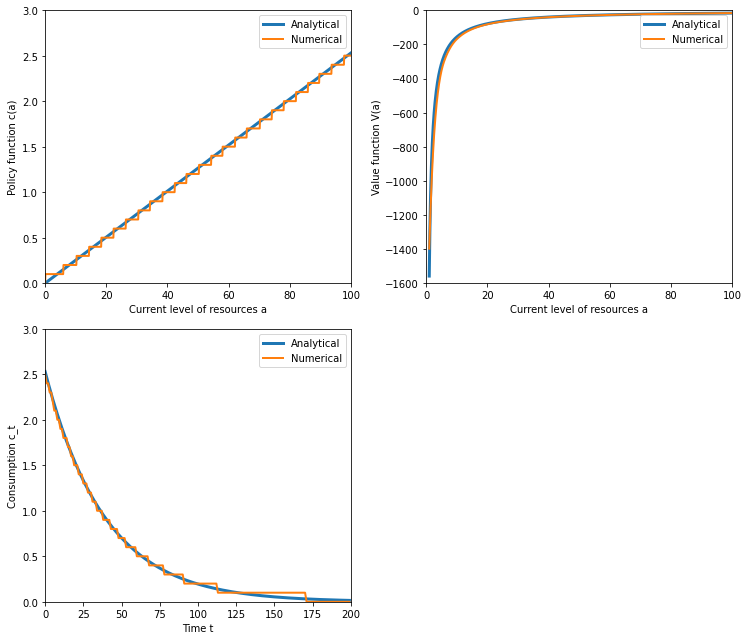

In [5]:
## Creating output plots for 8.3
ct = np.zeros(T)                #numerical consumption path
pos = np.zeros(T,dtype=int)     #location index for numerial consumption path
pos[0] = NA-1                   #initial location start as NA-1
ct[0] = c[-1]                   #initial numerical consumption value
cta = np.zeros(T)               #analytical consumption path
at = np.zeros(T)                #asset path

# calculating the time path of consumption numerically
tstart = time.time()
for t in range(1,T):
    pos[t] = loc[pos[t-1]]
    ct[t] = c[pos[t]]
tend = time.time()

time_taken = tend - tstart
print('Time taken: %2.5f seconds'%time_taken)

at[0] = a0                      #initially full resource
cta[0] = a0*(1-β**γ)            #consumption path from analytical model
for t in range(1,T):
    at[t] =  at[t-1]*β**γ       #asset left from analytical model
    cta[t] = at[t]*(1-β**γ)     #consumption path from analytical model
    


fig, axs = plt.subplots(2,2,figsize=(10.5,9))


axs[0,0].plot(a, a*(1-β**γ),label = 'Analytical',linewidth = 3)
axs[0,0].plot(a, c,label = 'Numerical',linewidth = 2)
axs[0,0].set_ylabel('Policy function c(a)')
axs[0,0].set_xlabel('Current level of resources a')
axs[0,0].set_xlim(0,100)
axs[0,0].set_ylim(0,3)
axs[0,0].legend(loc=0)


axs[0,1].plot(a[10:],(1-β**γ)**(-1.0/γ)*a[10:]**egam/egam,label = 'Analytical',linewidth = 3)
axs[0,1].plot(a[10:], V[10:],label = 'Numerical',linewidth = 2)
axs[0,1].set_xlim(0,100)
axs[0,1].set_ylim(-1600,0)
axs[0,1].set_ylabel('Value function V(a)')
axs[0,1].set_xlabel('Current level of resources a')
axs[0,1].legend(loc=0)

TT = np.linspace(0,T-1,T) 
axs[1,0].plot(TT, cta,label = 'Analytical',linewidth = 3)
axs[1,0].plot(TT, ct, label = 'Numerical',linewidth = 2)
axs[1,0].set_xlim(0,200)
axs[1,0].set_ylim(0,3)
axs[1,0].set_ylabel('Consumption c_t')
axs[1,0].set_xlabel('Time t')
axs[1,0].legend(loc=0)

fig.delaxes(axs[1,1])

fig.tight_layout()

err = np.zeros(NA)
for i in range(NA):
    err[i] = abs((c[i] - a[i]*(1-β**γ))/max(a[i]*(1-β**γ),1e-20))
print('Maximum relative consumption error is %2.2f%%.'%np.max(err))

In [6]:
# Program 8.4 How to speed up grid search (speed up 8.3)

# Fixed point iteration
V = np.zeros(NA) + 1e-4         #store value function results
c = np.zeros(NA)                #consumption path
Vnew = np.zeros(NA)             #calculating value function
U = np.zeros(NA)                #calculating utility function
loc = np.zeros(NA,dtype=int)    #store optimal result location

tstart = time.time()            #start time counting
#iterate until value function converges
for i in range(itermax+1):
    loc[0] = 0                  #iteration starts with location 0
    Vnew[0] = V[1] - 100.0      #iteration starts with V-100
    c[0] = 0.0                  #iteration starts with consumption 0
    #calculating optimal decisions for every gridpoint
    for v in range(1,NA):
        loc[v] = v-1
        cons   = max(a[v]-a[v-1],1e-10)         #guarantee positive consumption
        Utemp  = cons**egam/egam + β*V[v-1]     #calculating utility
        for t in range(v-2,-1,-1):
            cons  = max(a[v]-a[t],1e-10)        #guarantee positive new consumption
            Unew  = cons**egam/egam + β*V[t]    #calculating new utility
            if Unew > Utemp:
                Utemp = Unew                    #test which utility level is higher
                loc[v] = t
            else:
                break
        #get optimal consumption and value function
        c[v] = a[v] - a[loc[v]]
        Vnew[v] = Utemp
    
    #get convergence level
    if np.max(abs((Vnew-V)/V))<tol:
        break
    else:
        V = Vnew.copy()
tend = time.time()              #stop time counting
time_taken = tend - tstart      #count time spent
        
if i == itermax:
        print("!!! Results do not converge !!!")
else:
        print('Iteration: ',i,'Difference',np.max(abs((Vnew-V)/V)))
        print('Time taken: %2.f seconds'%time_taken)

Iteration:  441 Difference 9.801716447838506e-07
Time taken: 12 seconds


In [7]:
## Program 8.5 Solving the cake-eating problem with optimization and interpolation
from scipy.interpolate import interp1d as interp  #S=interp(x,y) => y=S(x)
from scipy.optimize import minimize

# Parameters
T = 200        #maximum time periods
NA = 200       #number of discretized levels
a0 = 100.0     #initial asset holding (resource size)
β = .95        #time discount factor
γ = .5         #intertemporal elasticity of substitution
egam = 1.0 - 1.0/γ  #denominator of utility function
tol = 1e-6     #tolerance
itermax = 2000 #maximum iteration number

# Variables
a = np.linspace(0,a0,NA)      #discretize asset levels
c = np.ones(NA)               #consumption trend
V = np.zeros(NA) + 1e-8       #store value function results
Vnew = np.zeros(NA)+ 1e-8     #value function in iteration
loc = np.zeros(NA)            #store locations of optimal results

#the function that should be minimized
def utility(x,index): 
    cons = max(a[index] - x, 1e-10)         #guarantee positive consumption
    Vplus = S(x)**egam/egam                 #calculate future utility
    util = -(cons**egam/egam + β*Vplus)     #get negative of utility function
    return util

tstart = time.time()            #start time counting
for i in range(itermax+1):
    #initialize values
    c[0] = 0.0
    Vnew[0] = V[1] - 1e+10
    S = interp(a,(egam*Vnew)**(1.0/egam),kind = 'cubic')  ##interpolation of value function on a
    for v in range(1,NA):
        x0 = a[v] - c[v]        #guess a value of solution
        aplus = minimize(utility, x0, args = (v),bounds=[(0.0,a0)]).x #find the asset solution of utility function
        c[v] = a[v] - aplus     #replace with the optimal consumption
        Vnew[v] = c[v]**egam/egam + β*S(aplus)**egam/egam   #calculate the value function
    #get convergence level
    if np.max(abs((Vnew-V)/V))<tol:
        break
    else:
        V = Vnew.copy()
tend = time.time()              #stop time counting
time_taken = tend - tstart      #count time spent
    
    
if i == itermax:
        print("!!! Results do not converge !!!")
else:
        print('Iteration: ',i,'Difference',np.max(abs((Vnew-V)/V)))
        print('Time taken: %2.f seconds'%time_taken)


Iteration:  420 Difference 9.924173482381667e-07
Time taken: 98 seconds


Maximum relative consumption error is 0.00%.


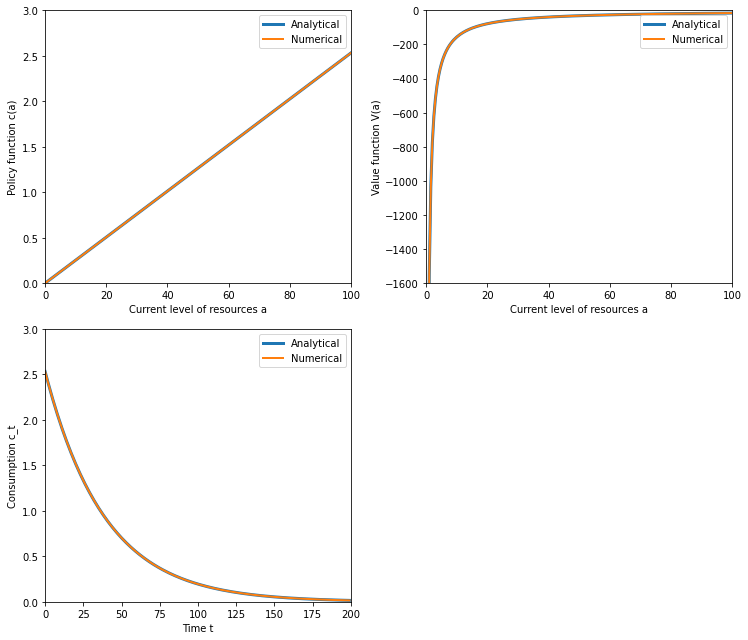

In [8]:
## Creating output plots for 8.5
Sc = interp(a,c,kind = 'cubic')     #numerical value function result
ct = np.zeros(T)                    #numerical consumption path
at = np.zeros(T)                    #asset path

at[0] = a0                          #initially full resource
ct[0] = Sc(at[0])                   #initial numerical consumption

for t in range(1,T):
    at[t] = at[t-1] - ct[t-1]       #calculate the time path of asset holding numerically
    ct[t] = Sc(at[t])               #calculate the time path of consumption numerically


fig, axs = plt.subplots(2,2,figsize=(10.5,9))


axs[0,0].plot(a, a*(1-β**γ),label = 'Analytical',linewidth = 3)
axs[0,0].plot(a, c,label = 'Numerical',linewidth = 2)
axs[0,0].set_ylabel('Policy function c(a)')
axs[0,0].set_xlabel('Current level of resources a')
axs[0,0].set_xlim(0,100)
axs[0,0].set_ylim(0,3)
axs[0,0].legend(loc=0)


axs[0,1].plot(a[1:],(1-β**γ)**(-1.0/γ)*a[1:]**egam/egam,label = 'Analytical',linewidth = 3)
axs[0,1].plot(a[1:], V[1:],label = 'Numerical',linewidth = 2)
axs[0,1].set_xlim(0,100)
axs[0,1].set_ylim(-1600,0)
axs[0,1].set_ylabel('Value function V(a)')
axs[0,1].set_xlabel('Current level of resources a')
axs[0,1].legend(loc=0)

TT = np.linspace(0,T-1,T) 
axs[1,0].plot(TT, cta,label = 'Analytical',linewidth = 3)
axs[1,0].plot(TT, ct, label = 'Numerical',linewidth = 2)
axs[1,0].set_xlim(0,200)
axs[1,0].set_ylim(0,3)
axs[1,0].set_ylabel('Consumption c_t')
axs[1,0].set_xlabel('Time t')
axs[1,0].legend(loc=0)


fig.delaxes(axs[1,1])

fig.tight_layout()
err = np.zeros(NA)
for i in range(NA):
    err[i] = abs((c[i] - a[i]*(1-β**γ))/max(a[i]*(1-β**γ),1e-20))
print('Maximum relative consumption error is %2.2f%%.'%np.max(err))

In [10]:
## Program 8.6 Determining the policy function with first-order conditions
import numpy as np
from scipy.interpolate import interp1d as interp  #S=interp(x,y) => y=S(x)
from scipy.optimize import brentq                 #brentq(f,a,b) finds root of f on interval [a,b]

# Vatiables
a = np.linspace(0,a0,NA)      #discretize assets
cnew = np.zeros(len(a))       #store new consumption

# Initialize variables
c = a.copy()/2
S = interp(a,c,kind = 'cubic') #interpolation of c on a => c=S(a)

# Define the first order condition
def foc(x,index):
    return a[index] - x - β**(-γ)*S(x) 

tstart = time.time()            #start time counting
for i in range(itermax+1):
    cnew[0] = .0 + 1e-6         #initialize
    
    for v in range(NA):
        x0 = a[v] - c[v]        #guess value
        cnew[v] = a[v] - brentq(foc, 0 , a0, args = (v))  #calculate new cnosumption
    
    S = interp(a,cnew,kind = 'cubic')   #interpolate cnew on a => cnew=S(a)
    #get convergence level
    if np.max(np.abs((cnew[1:]-c[1:])/c[1:])) < tol:
        break
    else:
        c = cnew.copy()
tend = time.time()              #stop time counting
time_taken = tend - tstart      #count time spent

if i == itermax:
        print("!!! Results do not converge !!!")
else:
        print('Iteration: ',i,'Difference',np.max(np.abs((cnew[1:]-c[1:])/c[1:])))
        print('Time taken: %2.f seconds'%time_taken)     

Iteration:  394 Difference 9.828120852400998e-07
Time taken: 18 seconds


Maximum relative consumption error is 0.00%.


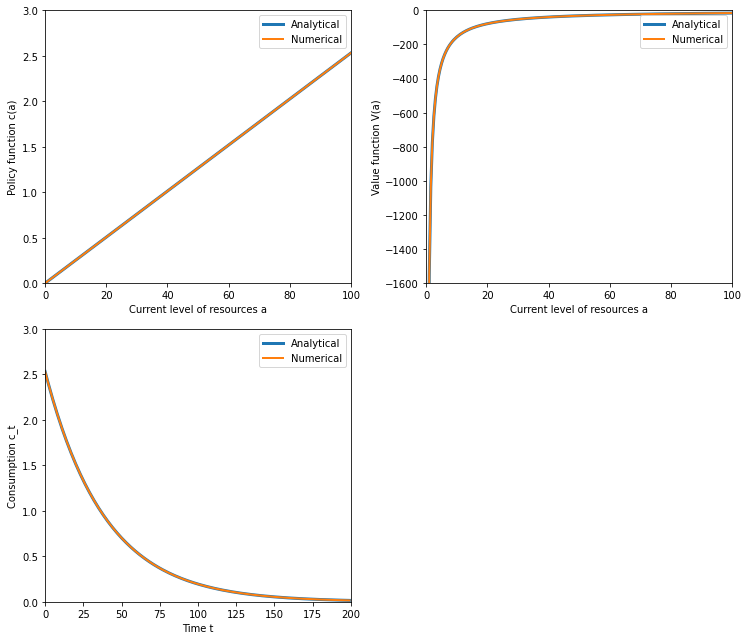

In [11]:
## Creating output plots for 8.6
Sc = interp(a,c,kind = 'cubic')     #numerical value function result
ct = np.zeros(T)                    #numerical consumption path
at = np.zeros(T)                    #asset path

at[0] = a0                          #initially full resource
ct[0] = Sc(at[0])                   #initial numerical consumption

for t in range(1,T):
    at[t] = at[t-1] - ct[t-1]       #calculate the time path of asset holding numerically
    ct[t] = Sc(at[t])               #calculate the time path of consumption numerically


fig, axs = plt.subplots(2,2,figsize=(10.5,9))


axs[0,0].plot(a, a*(1-β**γ),label = 'Analytical',linewidth = 3)
axs[0,0].plot(a, c,label = 'Numerical',linewidth = 2)
axs[0,0].set_ylabel('Policy function c(a)')
axs[0,0].set_xlabel('Current level of resources a')
axs[0,0].set_xlim(0,100)
axs[0,0].set_ylim(0,3)
axs[0,0].legend(loc=0)


axs[0,1].plot(a[1:],(1-β**γ)**(-1.0/γ)*a[1:]**egam/egam,label = 'Analytical',linewidth = 3)
axs[0,1].plot(a[1:], V[1:],label = 'Numerical',linewidth = 2)
axs[0,1].set_xlim(0,100)
axs[0,1].set_ylim(-1600,0)
axs[0,1].set_ylabel('Value function V(a)')
axs[0,1].set_xlabel('Current level of resources a')
axs[0,1].legend(loc=0)

TT = np.linspace(0,T-1,T) 
axs[1,0].plot(TT, cta,label = 'Analytical',linewidth = 3)
axs[1,0].plot(TT, ct, label = 'Numerical',linewidth = 2)
axs[1,0].set_xlim(0,200)
axs[1,0].set_ylim(0,3)
axs[1,0].set_ylabel('Consumption c_t')
axs[1,0].set_xlabel('Time t')
axs[1,0].legend(loc=0)


fig.delaxes(axs[1,1])

fig.tight_layout()
err = np.zeros(NA)
for i in range(NA):
    err[i] = abs((c[i] - a[i]*(1-β**γ))/max(a[i]*(1-β**γ),1e-20))
print('Maximum relative consumption error is %2.2f%%.'%np.max(err))

In [12]:
## Program 8.7 Cake-eating and endogenous gridpoints

# Variables
a_endog = np.zeros(NA)       #endogenous a trend
c_endog = np.zeros(NA)       #endogenous c trend
a = np.linspace(0, a0, NA)   #discretize asset levels
c = a.copy()/2.0             #initialize c trend

tstart = time.time()         #start time counting
for i in range(itermax + 1):
    a_endog[0] = .0          #initialize a=0
    c_endog[0] = .0          #initialize c=0
    #calculate optimal decision for every gridpoint
    for v in range(1,NA):
        c_endog[v] = β**(-γ) * c[v]     #calculate endogenous consumption
        a_endog[v] = a[v] + c_endog[v]  #calculate endogenous gridpoint
        
    S = interp(a_endog,c_endog,kind = 'cubic')   #c_endog=S(a_endog)
    cnew = S(a)                                  #cnew=S(a)
    #get convergence level
    if np.max(np.abs((cnew[1:]-c[1:])/c[1:])) < tol:
        break
    else:
        c = cnew.copy()
tend = time.time()              #stop time counting
time_taken = tend - tstart      #count time spent
if i == itermax:
        print("!!! Results do not converge !!!")
else:
        print('Iteration: ',i,'Difference',np.max(np.abs((cnew[1:]-c[1:])/c[1:])))
        print('Time taken: %2.5f seconds'%time_taken) 
    



Iteration:  394 Difference 9.82812079825751e-07
Time taken: 0.31531 seconds


Maximum relative consumption error is 0.00%.


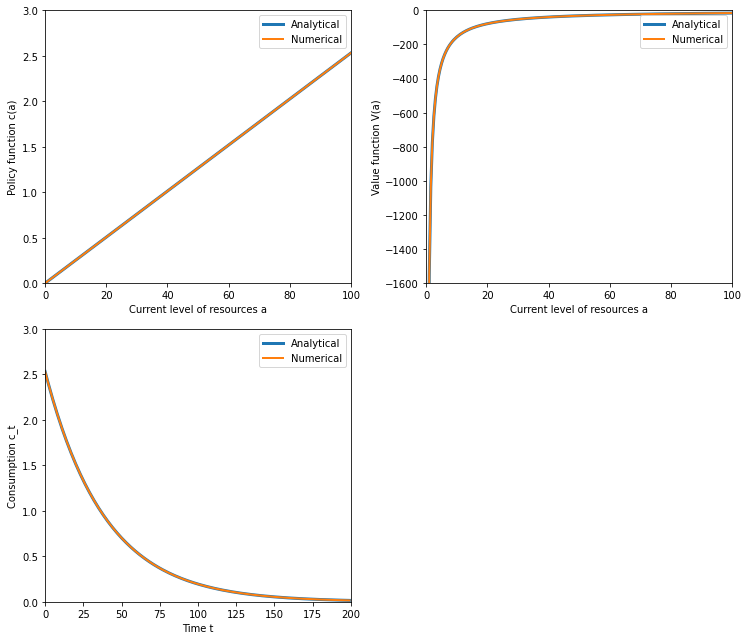

In [13]:
## Creating output plots for 8.7
Sc = interp(a,c,kind = 'cubic')     #numerical value function result
ct = np.zeros(T)                    #numerical consumption path
at = np.zeros(T)                    #asset path

at[0] = a0                          #initially full resource
ct[0] = Sc(at[0])                   #initial numerical consumption

for t in range(1,T):
    at[t] = at[t-1] - ct[t-1]       #calculate the time path of asset holding numerically
    ct[t] = Sc(at[t])               #calculate the time path of consumption numerically


fig, axs = plt.subplots(2,2,figsize=(10.5,9))


axs[0,0].plot(a, a*(1-β**γ),label = 'Analytical',linewidth = 3)
axs[0,0].plot(a, c,label = 'Numerical',linewidth = 2)
axs[0,0].set_ylabel('Policy function c(a)')
axs[0,0].set_xlabel('Current level of resources a')
axs[0,0].set_xlim(0,100)
axs[0,0].set_ylim(0,3)
axs[0,0].legend(loc=0)


axs[0,1].plot(a[1:],(1-β**γ)**(-1.0/γ)*a[1:]**egam/egam,label = 'Analytical',linewidth = 3)
axs[0,1].plot(a[1:], V[1:],label = 'Numerical',linewidth = 2)
axs[0,1].set_xlim(0,100)
axs[0,1].set_ylim(-1600,0)
axs[0,1].set_ylabel('Value function V(a)')
axs[0,1].set_xlabel('Current level of resources a')
axs[0,1].legend(loc=0)

TT = np.linspace(0,T-1,T) 
axs[1,0].plot(TT, cta,label = 'Analytical',linewidth = 3)
axs[1,0].plot(TT, ct, label = 'Numerical',linewidth = 2)
axs[1,0].set_xlim(0,200)
axs[1,0].set_ylim(0,3)
axs[1,0].set_ylabel('Consumption c_t')
axs[1,0].set_xlabel('Time t')
axs[1,0].legend(loc=0)


fig.delaxes(axs[1,1])

fig.tight_layout()
err = np.zeros(NA)
for i in range(NA):
    err[i] = abs((c[i] - a[i]*(1-β**γ))/max(a[i]*(1-β**γ),1e-20))
print('Maximum relative consumption error is %2.2f%%.'%np.max(err))